# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Required Packages.
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import warnings
warnings.filterwarnings("ignore")

###  **Dataset Exploration**

In [192]:
# pd.set_option('display.float_format',  '{:,.2f}'.format)
data_path = '/content/drive/MyDrive/Netflix_Movies_Tv_Shows/Netflixdata.csv'
netflixdf = pd.read_csv(data_path)

In [193]:
# Shape of dataset 
print(f'The total number of rows are {netflixdf.shape[0]}.')
print(f'The total number of columns are {netflixdf.shape[1]}.')

The total number of rows are 7787.
The total number of columns are 12.


In [194]:
# Column names
print(netflixdf.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [195]:
# Informatio about dataset. 
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [196]:
# First 5 rows of dataset
netflixdf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [197]:
# Last 5 rows of dataset
netflixdf.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [198]:
# Checking null values 
print(f'Null count of values by column wise.')
print('*'*40)
netflixdf.isnull().sum()

Null count of values by column wise.
****************************************


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [199]:
# Checking missing values in each column %
missing_val_count_by_column = netflixdf.isnull().sum()/len(netflixdf)
print((missing_val_count_by_column * 100 ).sort_values(ascending=False))

director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
rating           0.089893
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


### **Data Wrangling**

In [200]:
# Changing dtypes for date columns
netflixdf['date_added']=pd.to_datetime(netflixdf['date_added'])
# netflixdf['release_year']=pd.to_datetime(netflixdf['release_year'])

In [201]:
# create new features for analysis using date_added col
netflixdf['year_added'] = netflixdf['date_added'].dt.year
netflixdf['month_added']=netflixdf['date_added'].dt.month
netflixdf['month_name_added']=netflixdf['date_added'].dt.month_name()

In [202]:
# Filled missing values from director and cast column
netflixdf['director'] = netflixdf['director'].replace(np.nan, 'No Data')
netflixdf['cast'] = netflixdf['cast'].replace(np.nan, 'No Data')

In [203]:
# Dropped missing values from Country, date added and rating
netflixdf = netflixdf.dropna(subset=['country', 'date_added', 'rating'])

In [204]:
# Country column has mutiple countries for each movie/tv show
netflixdf['country'].unique()[:50]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United St

In [205]:
# Extracting only first country
netflixdf['country_col'] = netflixdf['country'].apply(lambda x: x.split(",")[0])

In [206]:
# Verifying null values
netflixdf.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
month_name_added    0
country_col         0
dtype: int64

In [207]:
# Rating columns unique values
netflixdf['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [208]:
rating_info = {'TV-MA':'Adults', 
                'R':'Adults',
                'PG-13':'Teens',
                'TV-14':'Young Adults',
                'TV-PG':'Older Kids',
                'NR':'Adults',
                'TV-G':'Kids',
                'TV-Y':'Kids',
                'TV-Y7':'Older Kids',
                'PG':'Older Kids',
                'G':'Kids',
                'NC-17':'Adults',
                'TV-Y7-FV':'Older Kids',
                'UR':'Adults'}
netflixdf['rating_col'] = netflixdf['rating'].replace(rating_info)

In [209]:
# Maturity level wise rating for tv and movies 
netflixdf['rating_col'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

In [210]:
# Creating separate dataframes for Movies and TV shows
netflix_movies_df = netflixdf[netflixdf['type']=='Movie']
netflix_shows_df = netflixdf[netflixdf['type']=='TV Show']

In [211]:
print(netflix_movies_df.shape)
print(netflix_shows_df.shape)

(5143, 17)
(2122, 17)


### **EDA**

In [212]:
netflixdf.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,country_col,rating_col
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020.0,8.0,August,Brazil,Adults


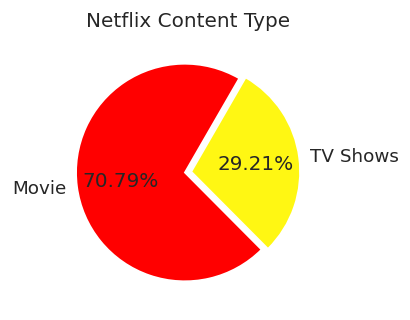

In [213]:
# sns.set(rc={"figure.dpi":120})
# sns.set_context('notebook')
labels=['Movie', 'TV Shows']
plt.pie(netflixdf['type'].value_counts(),labels=labels,explode=[0.03,0.03],
        autopct='%1.2f%%',colors=['#ff0000', '#fff713'], startangle=60)
plt.title('Netflix Content Type')
plt.show()

In [214]:
rating_count_df = netflixdf['rating_col'].value_counts().reset_index()
rating_count_df.rename({'index': 'Rating Category', 'rating_col': 'Total_Count'}, axis=1, inplace=True)
print(rating_count_df)

  Rating Category  Total_Count
0          Adults         3456
1    Young Adults         1792
2      Older Kids         1208
3            Kids          426
4           Teens          383


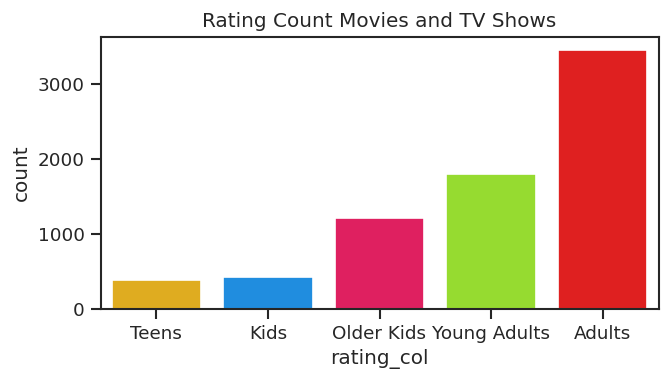

In [233]:
# palette = ['#ffbb00_Teens', '#0091ff_Kids', '#ff0055_OlderKids', '#9cf714_YoungAdults', '#ff0000_Adults'] Palette color info

order = ['Teens', 'Kids', 'Older Kids', 'Young Adults', 'Adults']
sns.set_style("ticks")
sns.countplot( x = 'rating_col',  data= netflixdf, order = order, palette = ['#ffbb00', '#0091ff', '#ff0055', '#9cf714', '#ff0000'])
plt.title('Rating Count Movies and TV Shows')
plt.show()

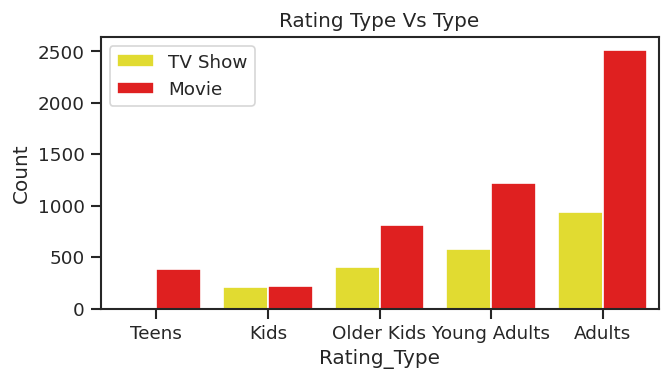

In [265]:
sns.set_style("ticks")
order = ['Teens', 'Kids', 'Older Kids', 'Young Adults', 'Adults']
sns.countplot(x="rating_col", hue = 'type', palette = ['#fff713', '#ff0000'], order = order, data=netflixdf)
plt.title('Rating Type Vs Type')
plt.xlabel('Rating_Type')
plt.ylabel('Count')
plt.legend(loc='upper left')
plt.show()

In [217]:
# Creating a subset for Netflix- Movies and TV shows
df_subset = netflixdf.loc[:, ['type', 'country_col', 'rating_col']]
print(df_subset)

         type     country_col    rating_col
0     TV Show          Brazil        Adults
1       Movie          Mexico        Adults
2       Movie       Singapore        Adults
3       Movie   United States         Teens
4       Movie   United States         Teens
...       ...             ...           ...
7781    Movie   United States    Older Kids
7782    Movie          Sweden        Adults
7783    Movie           India  Young Adults
7785  TV Show       Australia    Older Kids
7786    Movie  United Kingdom        Adults

[7265 rows x 3 columns]


In [218]:
# Country wise rating type including Movies and Tv Shows
country_wise_content = df_subset.groupby(['country_col'])
country_wise_content.rating_col.value_counts().to_frame()

rating_col
country_col  rating_col              
Argentina    Adults                51
             Young Adults          10
             Older Kids             4
             Kids                   3
Australia    Adults                52
...                               ...
Vietnam      Adults                 2
             Young Adults           2
             Kids                   1
West Germany Adults                 1
Zimbabwe     Kids                   1

[237 rows x 1 columns]

* **Netflix Movies EDA ->**

In [219]:
# Netflix Movies Rating Distribution
rating_count_movies_df = netflix_movies_df['rating_col'].value_counts().reset_index()
rating_count_movies_df.rename({'index': 'Rating Category', 'rating_col': 'Total_Count'}, axis=1, inplace=True)
print(rating_count_movies_df)

  Rating Category  Total_Count
0          Adults         2516
1    Young Adults         1216
2      Older Kids          807
3           Teens          383
4            Kids          221


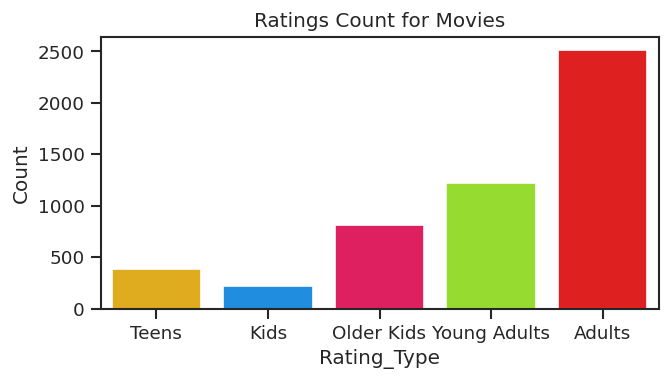

In [266]:
sns.countplot(netflix_movies_df.rating_col, order=order, palette = ['#ffbb00', '#0091ff', '#ff0055', '#9cf714', '#ff0000'], data = netflix_movies_df)
plt.title("Ratings Count for Movies")
plt.xlabel('Rating_Type')
plt.ylabel('Count')
plt.show()

In [221]:
# Country wise movies of Netflix
country_count_movies_df = netflix_movies_df['country_col'].value_counts().reset_index()
country_count_movies_df.rename({'index': 'Country_Name', 'country_col': 'Total_Count'}, axis=1, inplace=True)
print(country_count_movies_df[:20])

      Country_Name  Total_Count
0    United States         2097
1            India          883
2   United Kingdom          341
3           Canada          175
4           France          137
5            Spain          119
6            Egypt           93
7           Mexico           79
8           Turkey           78
9            Japan           75
10       Indonesia           74
11       Hong Kong           74
12     Philippines           74
13         Germany           68
14         Nigeria           63
15       Australia           56
16          Brazil           52
17       Argentina           50
18           China           48
19     South Korea           42


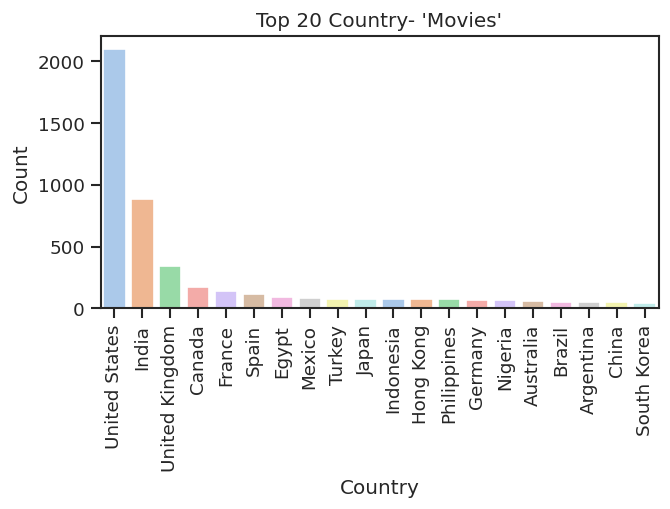

In [267]:
sns.countplot(x = 'country_col', order = netflix_movies_df.country_col.value_counts().index[:20], palette = 'pastel', data = netflix_movies_df)
plt.title("Top 20 Country- 'Movies'")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [250]:
# Country wise distributuion of movie ratings
df_movies_subset = netflix_movies_df.loc[:, ['type', 'country_col', 'rating_col']]
print(df_movies_subset)

       type     country_col    rating_col
1     Movie          Mexico        Adults
2     Movie       Singapore        Adults
3     Movie   United States         Teens
4     Movie   United States         Teens
6     Movie           Egypt        Adults
...     ...             ...           ...
7780  Movie           India        Adults
7781  Movie   United States    Older Kids
7782  Movie          Sweden        Adults
7783  Movie           India  Young Adults
7786  Movie  United Kingdom        Adults

[5143 rows x 3 columns]


In [252]:
 # Country wise distributuion of movie ratings
country_wise_movies_content = df_movies_subset.groupby(['country_col'])
country_wise_movies_content.rating_col.value_counts().to_frame()

rating_col
country_col  rating_col              
Argentina    Adults                38
             Young Adults           8
             Older Kids             3
             Kids                   1
Australia    Adults                29
...                               ...
Vietnam      Adults                 2
             Young Adults           2
             Kids                   1
West Germany Adults                 1
Zimbabwe     Kids                   1

[222 rows x 1 columns]

In [255]:
# Total count by countrywise of movies
country_wise_movies_content.size().sort_values(ascending = False)[:10]

country_col
United States     2097
India              883
United Kingdom     341
Canada             175
France             137
Spain              119
Egypt               93
Mexico              79
Turkey              78
Japan               75
dtype: int64

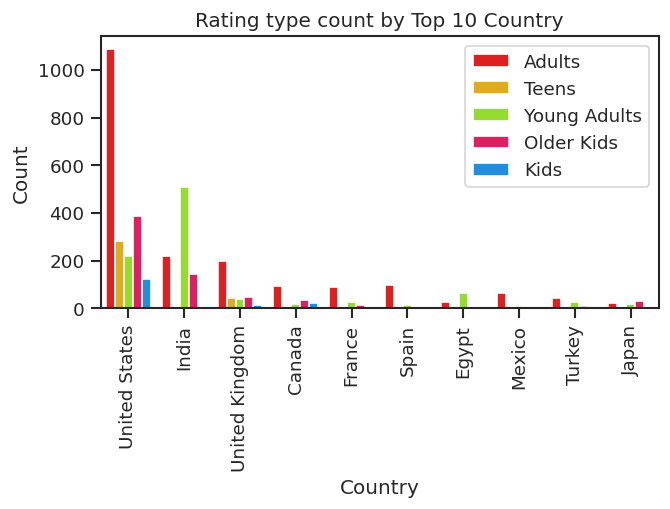

In [247]:
sns.countplot(x = 'country_col', hue = 'rating_col', palette = ['#ff0000', '#ffbb00', '#9cf714', '#ff0055', '#0091ff'], 
             order = netflix_movies_df.country_col.value_counts().index[:10], data = netflix_movies_df)
plt.title("Rating type count by Top 10 Country")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()

**NETFLIX TV SHOWS ->**

In [223]:
# Netflix TV Shows Rating Distribution
rating_count_shows_df = netflix_shows_df['rating_col'].value_counts().reset_index()
rating_count_shows_df.rename({'index': 'Rating Category', 'rating_col': 'Total_Count'}, axis=1, inplace=True)
print(rating_count_shows_df)

  Rating Category  Total_Count
0          Adults          940
1    Young Adults          576
2      Older Kids          401
3            Kids          205


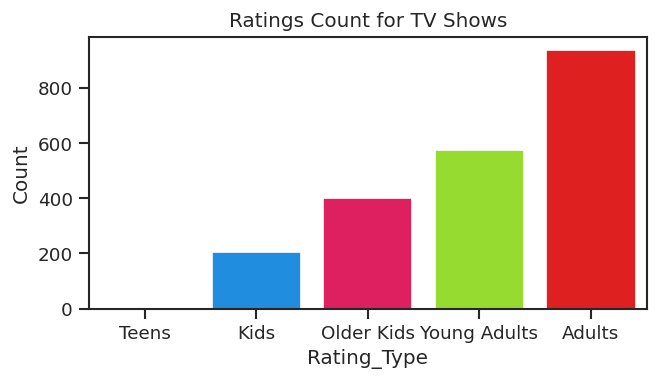

In [268]:
sns.countplot(netflix_shows_df.rating_col, order=order, palette = ['#ffbb00', '#0091ff', '#ff0055', '#9cf714', '#ff0000'], data = netflix_shows_df)
plt.title("Ratings Count for TV Shows")
plt.xlabel('Rating_Type')
plt.ylabel('Count')
plt.show()

In [225]:
country_count_shows_df = netflix_shows_df['country_col'].value_counts().reset_index()
country_count_shows_df.rename({'index': 'Country_Name', 'country_col': 'Total_Count'}, axis=1, inplace=True)
print(country_count_shows_df[:20])

      Country_Name  Total_Count
0    United States          777
1   United Kingdom          235
2            Japan          160
3      South Korea          152
4           Canada           84
5            India           73
6           Taiwan           70
7           France           59
8        Australia           50
9            Spain           49
10          Mexico           44
11           China           38
12          Turkey           28
13          Brazil           27
14         Germany           24
15        Colombia           23
16        Thailand           22
17       Singapore           18
18       Argentina           18
19           Italy           17


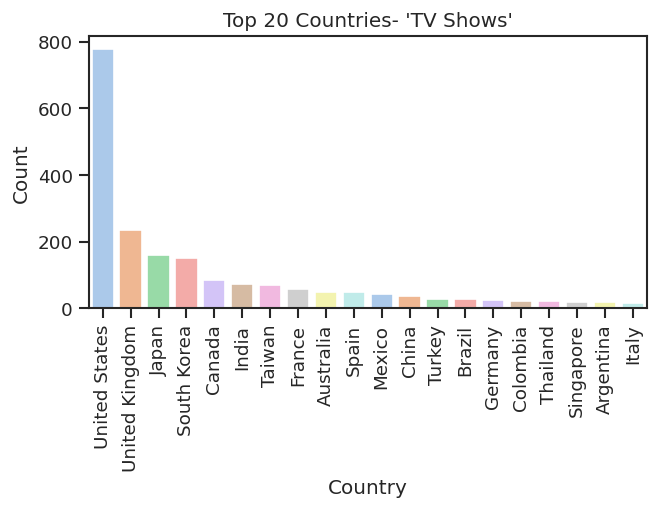

In [269]:
sns.countplot(x = 'country_col', order = netflix_shows_df.country_col.value_counts().index[:20], palette = 'pastel', data = netflix_shows_df)
plt.title("Top 20 Countries- 'TV Shows'")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [257]:
# Creating Tv shows subset for analysis of countrywise tv shows rating
df_shows_subset = netflix_shows_df.loc[:, ['type', 'country_col', 'rating_col']]
print(df_shows_subset)

         type country_col    rating_col
0     TV Show      Brazil        Adults
5     TV Show      Turkey        Adults
11    TV Show      Poland        Adults
12    TV Show      Mexico        Adults
24    TV Show       Japan  Young Adults
...       ...         ...           ...
7766  TV Show      France    Older Kids
7767  TV Show    Pakistan    Older Kids
7775  TV Show       Japan    Older Kids
7779  TV Show      Mexico        Adults
7785  TV Show   Australia    Older Kids

[2122 rows x 3 columns]


In [258]:
# Country wise distributuion of movie ratings
country_wise_shows_content = df_shows_subset.groupby(['country_col'])
country_wise_shows_content.rating_col.value_counts().to_frame()

rating_col
country_col   rating_col              
Argentina     Adults                13
              Kids                   2
              Young Adults           2
              Older Kids             1
Australia     Adults                23
...                                ...
United States Adults               318
              Young Adults         190
              Older Kids           178
              Kids                  91
Uruguay       Kids                   1

[135 rows x 1 columns]

In [259]:
# Total count by countrywise of TV Shows
country_wise_shows_content.size().sort_values(ascending = False)[:10]

country_col
United States     777
United Kingdom    235
Japan             160
South Korea       152
Canada             84
India              73
Taiwan             70
France             59
Australia          50
Spain              49
dtype: int64

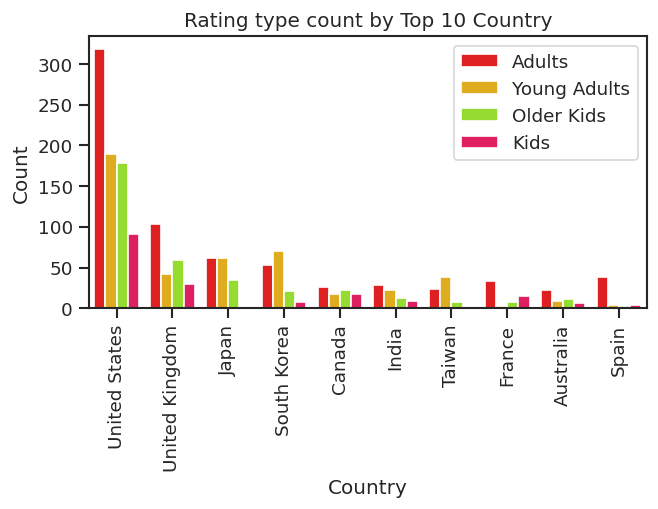

In [261]:
sns.countplot(x = 'country_col', hue = 'rating_col', palette = ['#ff0000', '#ffbb00', '#9cf714', '#ff0055', '#0091ff'], 
             order = netflix_shows_df.country_col.value_counts().index[:10], data = netflix_shows_df)
plt.title("Rating type count by Top 10 Country")
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(loc='upper right')
plt.show()